In [1]:
#This is a project for linear and polynomial regression

In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
data_raw = pd.read_csv("weatherHistory.csv")
data_raw.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [3]:
data_clean = data_raw.filter(['Pressure (millibars)','Humidity','Precip Type','Apparent Temperature (C)','Temperature (C)'], axis=1)

In [4]:
data_clean = data_clean.rename(columns={"Pressure (millibars)": "pres", "Precip Type": "prec", "Humidity": "hum", "Apparent Temperature (C)": "apt",'Temperature (C)': 'temp'})

In [5]:
data_clean = data_clean.replace({"rain":1, "snow":2})
data_clean = data_clean.fillna(0)
data_clean = data_clean.astype({'prec': 'int32'})
data_clean

,pres,hum,prec,apt,temp
0,1015.13,0.89,1,7.388889,9.472222
1,1015.63,0.86,1,7.227778,9.355556
2,1015.94,0.89,1,9.377778,9.377778
3,1016.41,0.83,1,5.944444,8.288889
4,1016.51,0.83,1,6.977778,8.755556
...,...,...,...,...,...
96448,1014.36,0.43,1,26.016667,26.016667
96449,1015.16,0.48,1,24.583333,24.583333
96450,1015.66,0.56,1,22.038889,22.038889
96451,1015.95,0.60,1,21.522222,21.522222


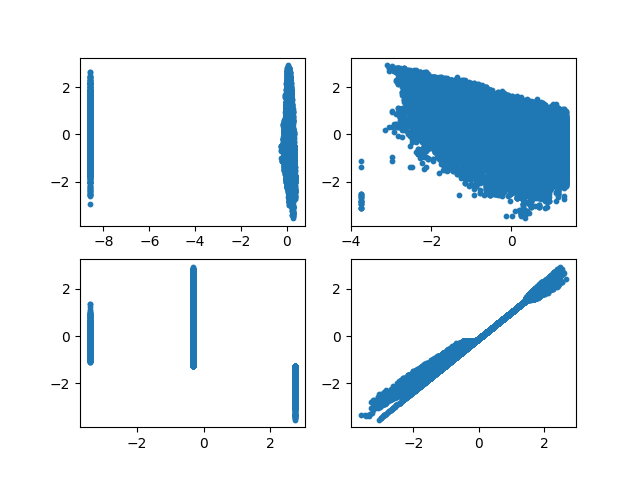

In [11]:
data_normalized=(data_clean-data_clean.mean())/data_clean.std()

fig, ax = plt.subplots(nrows=2, ncols=2)

cols = data_normalized.columns.to_list()
cols.pop()

ind = 0

for row in ax:
    for col in row:
        col.scatter(data_normalized[cols[ind]], data_normalized["temp"], s=10)
        ind += 1
        
plt.show()

In [12]:
train_data=data_normalized.sample(frac=0.8, random_state=25)
test_data=data_normalized.drop(train_data.index)

train_sample_x = train_data.filter(["apt"], axis=1).to_numpy()
train_sample_y = train_data.filter(["temp"], axis=1).to_numpy()

test_sample_x = test_data.filter(["apt"], axis=1).to_numpy()
test_sample_y = test_data.filter(["temp"], axis=1).to_numpy()

In [13]:
## 4th graph can be represented using lenient regression

## f = w1x1 + w2x2 + b = w_ x_ + b
## f = w_ x_ + b
## J = 1/2m * SUM (f(w,b) - y)^2
##
## J' = 1/2m * SUM [ (wx + (b - y) )^2 ]'
## J' = 1/2m * SUM [ (w^2x^2 + 2wx(b - y) + (b-y)^2) ]'
##
## J'w = 1/2m * SUM d/dw [ (w^2x^2 + 2wx(b-y) + b^2 - 2by + y^2) ]'
## J'w = 1/2m * SUM [ 2wx^2 + 2x(b-y) ] = 1/2m * 2 * SUM [ wx^2 + xb - xy ] = 1/2m * SUM * 2x * [ wx + b - y ]
## J'w = x/m * SUM [f(w,b) - y] => x[i] * SUM [f(w,b) - y[i]] / m
##
## J'b = 1/2m * SUM d/dw [ (w^2x^2 + 2wx(b-y) + b^2 - 2by + y^2) ]'
## J'b = 1/2m * SUM [ 2wx + 2b - 2y ] = 1/2m * 2 * SUM [ wx + b - y ] 
## J'b = 1/m * SUM [f(w,b) - y] => SUM [f(w,b) - y[i]] / m
##
## =>
## J'w = x[i] * SUM [f(w,b) - y[i]] / m
## J'b = SUM [f(w,b) - y[i]] / m
##

In [14]:
def fwb_1(x, w, b):
    return np.dot(x, w) + b

In [15]:
def cost(X, y, w, b, fwb=fwb_1):
    m = X.shape[0]
    cost_ = 0.0;
    for i in range(m):
        f_wb = fwb(X[i],w,b)
        sq = (f_wb - y[i])**2 / (2 * m)
        cost_ = cost_ + sq

    return cost_[0];

In [16]:
## Gradient Descent
##
def gradient(X, y, w, b, fwb=fwb_1):
    dw = 0
    db = 0
    m = X.shape[0]

    for i in range(m):
        f_wb = fwb(X[i],w,b)
        d_dw = X[i] * (f_wb - y[i]) / m
        d_db = (f_wb - y[i]) / m
        dw += d_dw
        db += d_db
    return dw, db

In [17]:
## Train
##
def train(X, y, w, b, lam = 0.01, treshold = 0.001, fwb=fwb_1):
    step = 1
    cost_ = cost(X, y, w, b, fwb)
    cost_last_ = cost_
    dif = treshold + 1
    print("step: ", step, " cost ", cost_, " w = ", w, " b = ", b)
    step += 1
    while cost_ > treshold and dif > treshold:
        dw, db = gradient(X, y, w, b, fwb);
        w -= lam * dw
        b -= lam * db
        cost_ = cost(X, y, w, b, fwb)
        dif = np.abs(cost_ - cost_last_)
        cost_last_ = cost_
        print("step: ", step, " cost = ", cost_, " dif = ", dif, " w = ", w, " b = ", b)
        step += 1


    return w, b

In [18]:
def fwb_plot(x, fwb=fwb_1):
    m = x.shape[0]
    y_ = np.zeros(m)
    for i in range(m):
        y_[i] = fwb(x[i], w, b)[0]
    return y_

step:  1  cost  0.5005216973285114  w =  [0.]  b =  [0.]
step:  2  cost =  0.4067840817681811  dif =  0.09373761556033028  w =  [0.09933386]  b =  [0.00030174]
step:  3  cost =  0.33086277896937694  dif =  0.07592130279880416  w =  [0.18873079]  b =  [0.0005451]
step:  4  cost =  0.2693714931313618  dif =  0.06149128583801511  w =  [0.26918483]  b =  [0.00073873]
step:  5  cost =  0.219567556696004  dif =  0.049803936435357826  w =  [0.34159061]  b =  [0.00089016]
step:  6  cost =  0.17922959599496355  dif =  0.040337960701040454  w =  [0.40675323]  b =  [0.00100589]
step:  7  cost =  0.1465584491421444  dif =  0.03267114685281916  w =  [0.46539729]  b =  [0.00109154]
step:  8  cost =  0.12009691655619034  dif =  0.026461532585954045  w =  [0.51817487]  b =  [0.00115198]
step:  9  cost =  0.09866476455116269  dif =  0.021432152005027655  w =  [0.56567283]  b =  [0.00119138]
step:  10  cost =  0.0813060828143446  dif =  0.017358681736818093  w =  [0.60841933]  b =  [0.00121336]
step:  1

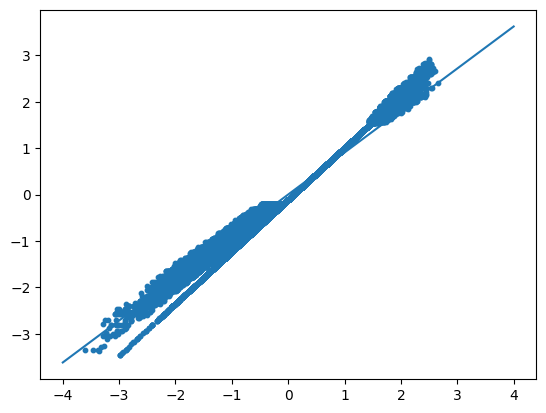

In [293]:
X = train_sample_x
y = train_sample_y
w = np.zeros(1)
b = np.zeros(1)

w, b = train(X, y, w, b, lam = 0.1, treshold = 0.001, fwb=fwb_1)

print("Result: ")
print("w = ", w)
print("b = ", b)

fig, ax = plt.subplots(nrows=1, ncols=1)
x = np.linspace(-4, 4, 100)
ax.plot(x, fwb_plot(x));
ax.scatter(X, y, s=10)

        
plt.show()

In [299]:
print(train_sample_x)
print(test_sample_x)

[[ 0.08055063]
 [ 0.83414754]
 [-0.64967491]
 ...
 [ 0.01718824]
 [ 1.5768378 ]
 [ 1.40648647]]
[[ 0.06496971]
 [-0.06902615]
 [-0.61539689]
 ...
 [ 0.28206379]
 [ 1.12343319]
 [ 1.28339724]]


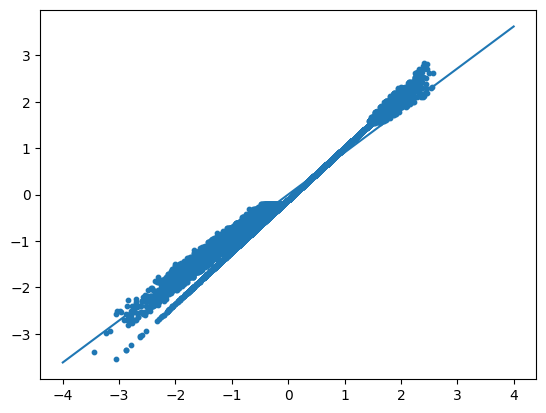

cost  0.011091662627021217


In [302]:
## for test samples
##
X_test = test_sample_x
y_test = test_sample_y

fig, ax = plt.subplots(nrows=1, ncols=1)
x = np.linspace(-4, 4, 100)
ax.plot(x, fwb_plot(x, fwb=fwb_1));
ax.scatter(X_test, y_test, s=10)

        
plt.show()

print("cost ", cost(X_test, y_test, w, b))

step:  1  cost  0.5005216973285114  w =  [0. 0.]  b =  [0.]
step:  2  cost =  0.41609602745565744  dif =  0.08442566987285394  w =  [0.09933386 0.09933386]  b =  [0.00030174]
step:  3  cost =  0.3652133769155005  dif =  0.05088265054015695  w =  [0.18917578 0.18917578]  b =  [-0.00939176]
step:  4  cost =  0.33784898811221103  dif =  0.027364388803289452  w =  [0.2704356 0.2704356]  b =  [-0.02712874]
step:  5  cost =  0.3267299571117925  dif =  0.011119031000418556  w =  [0.34393566 0.34393566]  b =  [-0.05124392]
step:  6  cost =  0.32661498322792604  dif =  0.0001149738838664427  w =  [0.41041926 0.41041926]  b =  [-0.08032102]
step:  7  cost =  0.33375585761540955  dif =  0.007140874387483509  w =  [0.47055826 0.47055826]  b =  [-0.11315997]
step:  8  cost =  0.3454962232908125  dif =  0.01174036567540293  w =  [0.52496001 0.52496001]  b =  [-0.1487481]
step:  9  cost =  0.35997373708734565  dif =  0.01447751379653317  w =  [0.57417349 0.57417349]  b =  [-0.18623494]
step:  10  cos

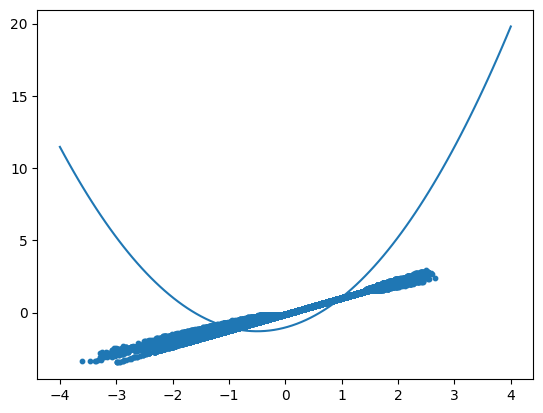

In [303]:
## with 2:
##
##
            
X = train_sample_x
y = train_sample_y
w = np.zeros(2)
b = np.zeros(1)

def fwb_2(x,w,b):
    return np.dot(x, w[0]) + np.dot(x**2, w[1]) + b

w, b = train(X, y, w, b, lam = 0.1, treshold = 0.0001, fwb=fwb_2)

print("Result: ")
print("w = ", w)
print("b = ", b)

fig, ax = plt.subplots(nrows=1, ncols=1)
x = np.linspace(-4, 4, 100)
ax.plot(x, fwb_plot(x, fwb=fwb_2));
ax.scatter(X, y, s=10)

        
plt.show()

step:  1  cost  0.5005216973285114  w =  [0. 0. 0.]  b =  [0.]
step:  2  cost =  0.2462226410226934  dif =  0.25429905630581795  w =  [0.09933386 0.09933386 0.09933386]  b =  [0.00030174]
step:  3  cost =  0.1564779626728376  dif =  0.0897446783498558  w =  [0.16638004 0.16638004 0.16638004]  b =  [-0.00894676]
step:  4  cost =  0.13169585731379602  dif =  0.024782105359041573  w =  [0.21163608 0.21163608 0.21163608]  b =  [-0.02369606]
step:  5  cost =  0.13019374552054946  dif =  0.0015021117932465522  w =  [0.24218623 0.24218623 0.24218623]  b =  [-0.04130772]
step:  6  cost =  0.13532987101405078  dif =  0.0051361254935013145  w =  [0.26281132 0.26281132 0.26281132]  b =  [-0.06008612]
step:  7  cost =  0.14101582152369474  dif =  0.005685950509643961  w =  [0.27673773 0.27673773 0.27673773]  b =  [-0.07896336]
step:  8  cost =  0.1454256728394419  dif =  0.004409851315747171  w =  [0.28614285 0.28614285 0.28614285]  b =  [-0.09728758]
step:  9  cost =  0.148327155641653  dif =  0.

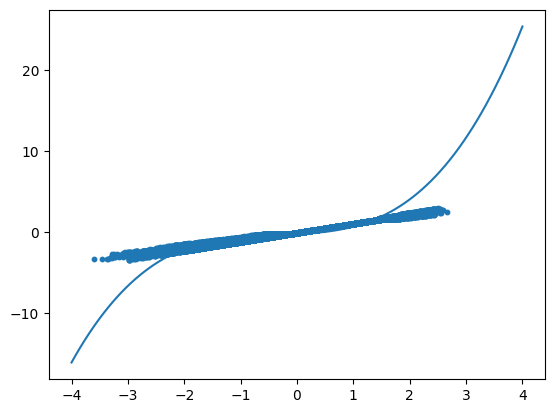

In [304]:
## with 3:
##
##

X = train_sample_x
y = train_sample_y
w = np.zeros(3)
b = np.zeros(1)

def fwb_3(x,w,b):
    return np.dot(x, w[0]) + np.dot(x**2, w[1]) + np.dot(x**3, w[2]) + b

w, b = train(X, y, w, b, lam = 0.1, treshold = 0.0001, fwb=fwb_3)

print("Result: ")
print("w = ", w)
print("b = ", b)

fig, ax = plt.subplots(nrows=1, ncols=1)
x = np.linspace(-4, 4, 100)
ax.plot(x, fwb_plot(x, fwb=fwb_3));
ax.scatter(X, y, s=10)

        
plt.show()

step:  1  cost  0.5005216973285114  w =  [0. 0. 0. 0.]  b =  [0.]
step:  2  cost =  0.4754105944304478  dif =  0.025111102898063564  w =  [0.09933386 0.09933386 0.09933386 0.09933386]  b =  [0.00030174]
step:  3  cost =  0.7920055508836779  dif =  0.31659495645323005  w =  [0.16973392 0.16973392 0.16973392 0.16973392]  b =  [-0.0317425]
step:  4  cost =  1.1660964469746  dif =  0.37409089609092216  w =  [0.21963711 0.21963711 0.21963711 0.21963711]  b =  [-0.08348523]
step:  5  cost =  1.4934287731743516  dif =  0.3273323261997516  w =  [0.25501932 0.25501932 0.25501932 0.25501932]  b =  [-0.14628845]
step:  6  cost =  1.7472704741412102  dif =  0.25384170096685854  w =  [0.28011331 0.28011331 0.28011331 0.28011331]  b =  [-0.21432206]
step:  7  cost =  1.9312654631341595  dif =  0.1839949889929493  w =  [0.29791731 0.29791731 0.29791731 0.29791731]  b =  [-0.28371602]
step:  8  cost =  2.058606571753827  dif =  0.12734110861966763  w =  [0.3105551 0.3105551 0.3105551 0.3105551]  b =  

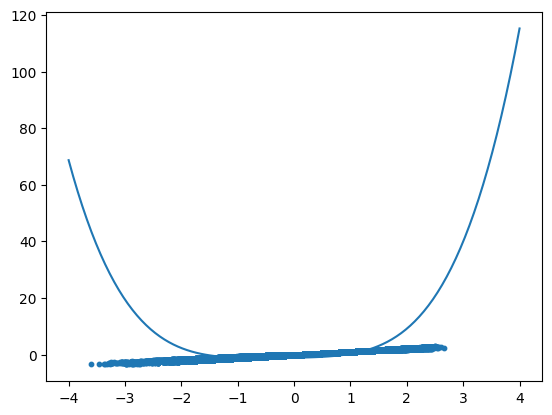

In [305]:
## with 4:
##
##

X = train_sample_x
y = train_sample_y
w = np.zeros(4)
b = np.zeros(1)

def fwb_4(x,w,b):
    return np.dot(x, w[0]) + np.dot(x**2, w[1]) + np.dot(x**3, w[2]) + np.dot(x**4, w[3]) + b

w, b = train(X, y, w, b, lam = 0.1, treshold = 0.0001, fwb=fwb_4)

print("Result: ")
print("w = ", w)
print("b = ", b)

fig, ax = plt.subplots(nrows=1, ncols=1)
x = np.linspace(-4, 4, 100)
ax.plot(x, fwb_plot(x, fwb=fwb_4));
ax.scatter(X, y, s=10)

        
plt.show()

In [19]:
## lets take more data: humidity and apt temp
## 

train_sample_x = train_data.filter(["apt", "hum"], axis=1).to_numpy()
train_sample_y = train_data.filter(["temp"], axis=1).to_numpy()

test_sample_x = test_data.filter(["apt", "hum"], axis=1).to_numpy()
test_sample_y = test_data.filter(["temp"], axis=1).to_numpy()

In [23]:
X = train_sample_x
y = train_sample_y
w = np.zeros(2)
b = np.zeros(1)

w, b = train(X, y, w, b, lam = 0.1, treshold = 0.001, fwb=fwb_1)

print("Result: ")
print("w = ", w)
print("b = ", b)

step:  1  cost  0.5005216973285114  w =  [0. 0.]  b =  [0.]
step:  2  cost =  0.37222624397609083  dif =  0.12829545335242054  w =  [ 0.09933386 -0.0635737 ]  b =  [0.00030174]
step:  3  cost =  0.28049864549974074  dif =  0.09172759847635009  w =  [ 0.18487848 -0.11473668]  b =  [0.00053666]
step:  4  cost =  0.21462744120442206  dif =  0.06587120429531867  w =  [ 0.2587653  -0.15557226]  b =  [0.000717]
step:  5  cost =  0.1670620806504382  dif =  0.04756536055398386  w =  [ 0.32278635 -0.18782513]  b =  [0.00085291]
step:  6  cost =  0.13247831952857728  dif =  0.03458376112186093  w =  [ 0.37844862 -0.21295599]  b =  [0.00095276]
step:  7  cost =  0.10712009811718307  dif =  0.02535822141139421  w =  [ 0.42701986 -0.23218737]  b =  [0.00102349]
step:  8  cost =  0.08833609974926927  dif =  0.018783998367913793  w =  [ 0.46956691 -0.24654208]  b =  [0.00107081]
step:  9  cost =  0.07425339041403936  dif =  0.014082709335229912  w =  [ 0.50698793 -0.25687544]  b =  [0.0010994]
step: 

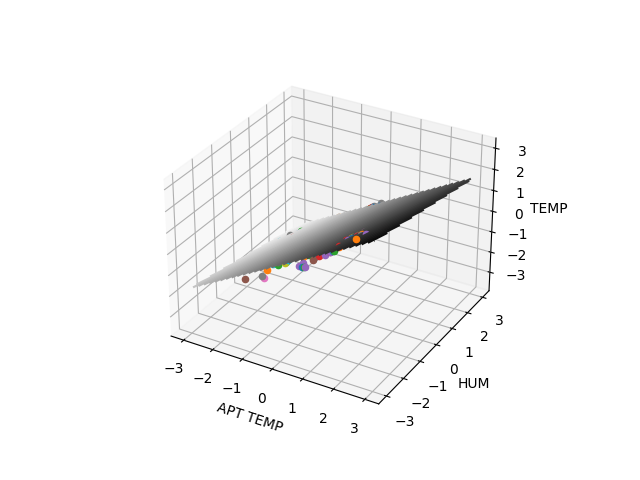

In [79]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

X1S = X[:1000, 0]
X2S = X[:1000, 1]
YS = y[:1000, 0]

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in range(X1S.shape[0]):
    xs = X1S[i]
    ys = X2S[i]
    zs = YS[i]
    ax.scatter(xs, ys, zs, marker='o')
    
def fwb3d(x__, y__):
    m = x__.shape[0]
    z__ = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            z__[i,j] = x__[i,j] * w[0] + y__[i,j] * w[1] + b
    return z__

x_ = np.linspace(-3, 3, 30)
y_ = np.linspace(-3, 3, 30)

X_, Y_ = np.meshgrid(x_, y_)
Z_ = fwb3d(X_, Y_)

ax.contour3D(X_, Y_, Z_, 50, cmap='binary')

ax.set_xlabel('APT TEMP')
ax.set_ylabel('HUM')
ax.set_zlabel('TEMP')

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
